# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *
from genetic import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Random Restart Hill-Climbing


In [6]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 0.0


In [7]:
RR = Random_restart(cube=cube,max_restart=100)

Initial Value: 584532.0

Restart: 1

Initial Value: 584532.0

Step 1: Choosen Neighbor Value: 483219.0; Best Value: 584532.0
Step 2: Choosen Neighbor Value: 459218.0; Best Value: 483219.0
Iteration Value: 459218.0

Best Value: 459218.0

Restart: 2

Initial Value: 584532.0

Step 1: Choosen Neighbor Value: 526676.0; Best Value: 584532.0
Step 2: Choosen Neighbor Value: 454418.0; Best Value: 526676.0
Iteration Value: 454418.0

Best Value: 454418.0

Restart: 3

Initial Value: 584532.0

Step 1: Choosen Neighbor Value: 491248.0; Best Value: 584532.0
Step 2: Choosen Neighbor Value: 461248.0; Best Value: 491248.0
Step 3: Choosen Neighbor Value: 437472.0; Best Value: 461248.0
Iteration Value: 437472.0

Best Value: 437472.0

Restart: 4

Initial Value: 584532.0

Step 1: Choosen Neighbor Value: 510789.0; Best Value: 584532.0
Iteration Value: 510789.0

Best Value: 437472.0

Restart: 5

Initial Value: 584532.0

Step 1: Choosen Neighbor Value: 454561.0; Best Value: 584532.0
Iteration Value: 454561.0



In [8]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 15

  final Value: 357070.000000

+-------------------------- END ---------------------------+


In [9]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

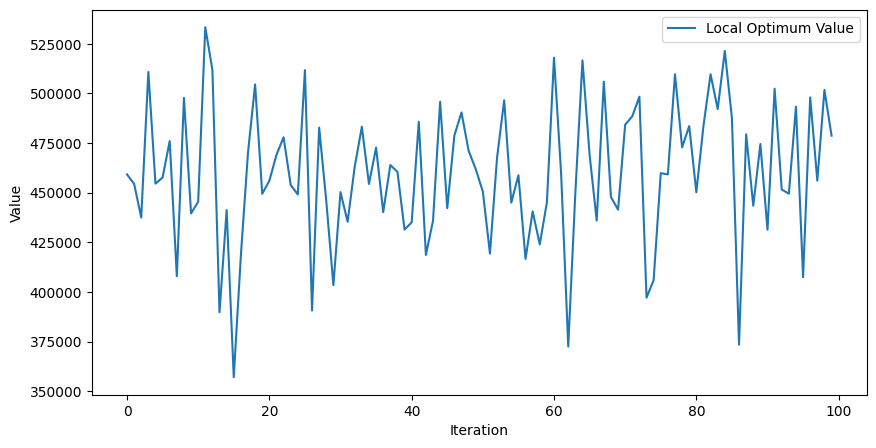

In [10]:
RR.hist_plot()

### Simulated Annealing

#### Initial State

In [11]:
# quadratica_cube = copy.deepcopy(cube)
SA_cube = copy.deepcopy(cube)

#### Searching

In [29]:
SA = Simulated(cube=SA_cube,tmax=500000,step_max=5000,cooling_schedule="quadratic",alpha=0.99)

Initial Energy: 584532.0

Step:1, Energy: 544422.0, Best Energy: 584532.0,Temperature: 500000, Probability: 1.0835254170473168

Step:2, Energy: 519483.0, Best Energy: 544422.0,Temperature: 251256.2814070352, Probability: 1.1043503240192742

Step:3, Energy: 498747.0, Best Energy: 519483.0,Temperature: 100806.45161290323, Probability: 1.2283860091140384

Step:4, Energy: 476987.0, Best Energy: 498747.0,Temperature: 50454.08678102926, Probability: 1.5392313985698636

Step:5, Energy: 440052.0, Best Energy: 476987.0,Temperature: 29691.21140142518, Probability: 3.4693622935681656

Step:6, Energy: 425172.0, Best Energy: 440052.0,Temperature: 19417.47572815534, Probability: 2.151832920257706

Step:7, Energy: 408857.0, Best Energy: 425172.0,Temperature: 13646.288209606986, Probability: 3.30541885827114

Step:8, Energy: 397217.0, Best Energy: 408857.0,Temperature: 10098.969905069684, Probability: 3.1663920970992394

Step:9, Energy: 382565.0, Best Energy: 397217.0,Temperature: 7768.800497203232, P

#### Plot

Best Energy 

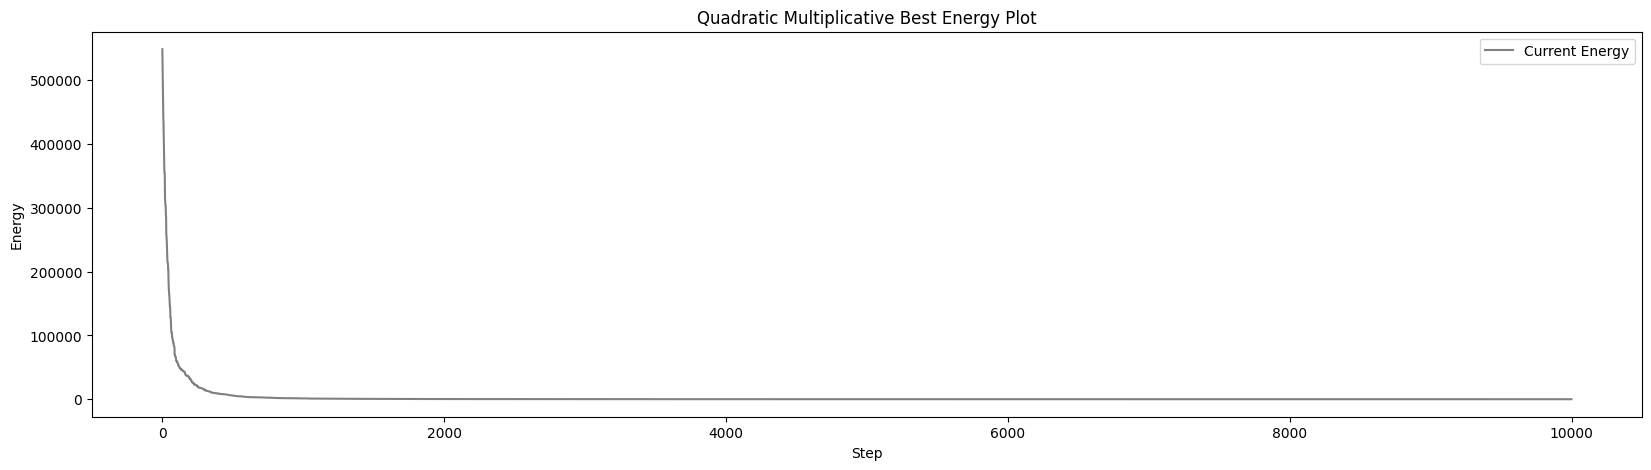

In [26]:
# SA_QuadraticA.hist_plot(Curr_energy=False,title="Quadratic Additive Best Energy Plot")
SA.hist_plot(Best_energy=False,title="Quadratic Multiplicative Best Energy Plot")

Probability

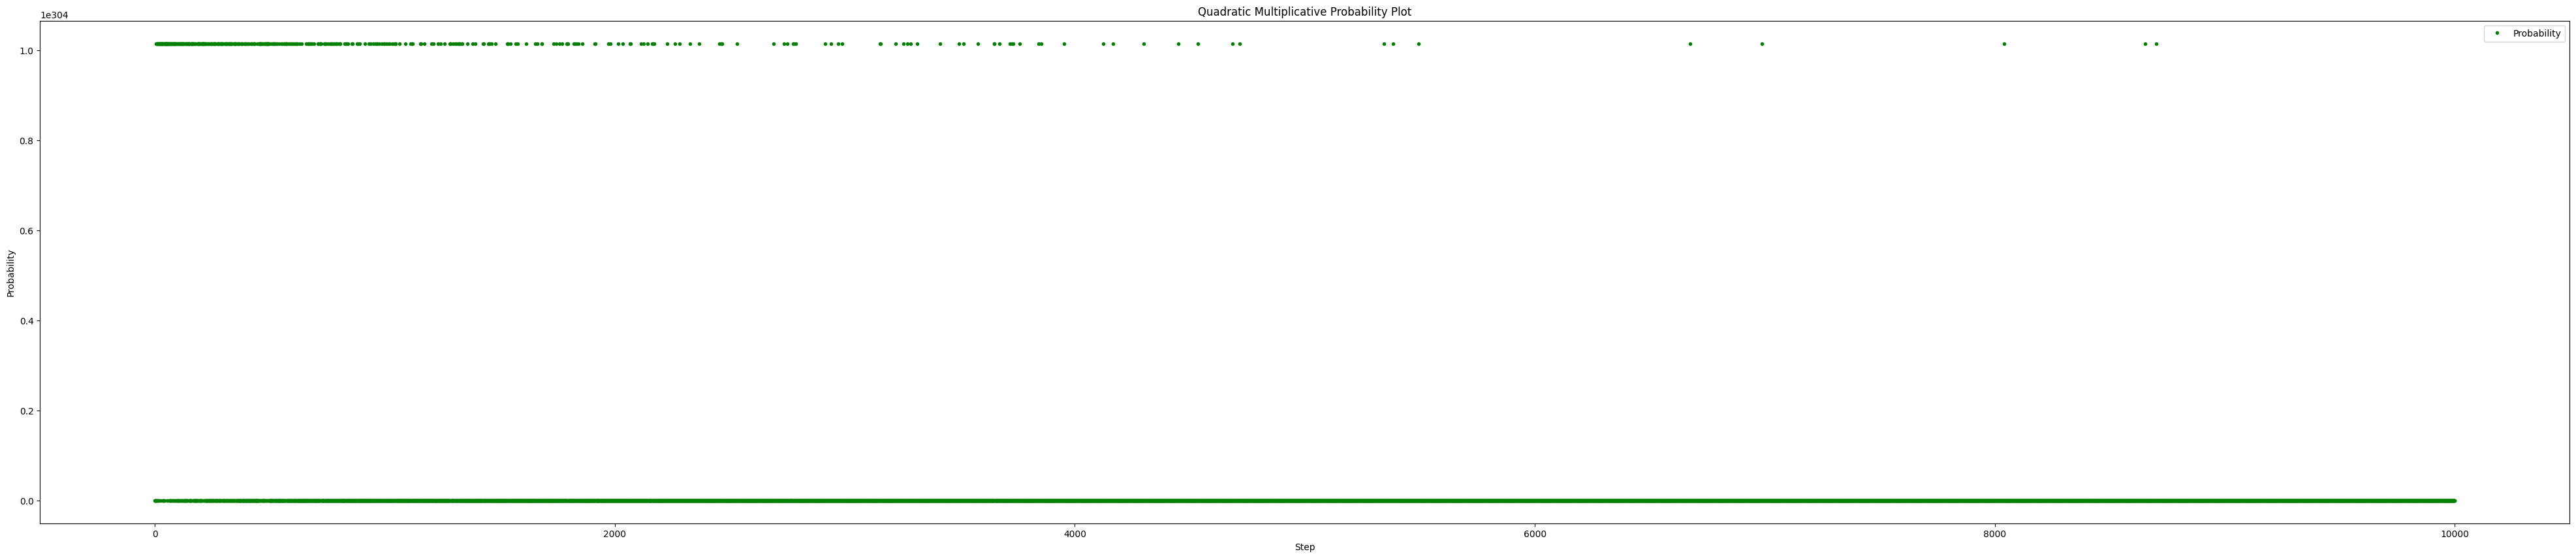

In [27]:
SA.prob_plot(title="Quadratic Multiplicative Probability Plot")

#### Results

In [23]:
SA.results()

+------------------------ RESULTS -------------------------+

    cooling sched.: quadratic multiplicative
    initial temp: 1000
    final temp: 2.062019696754851e-05
    final step: 7000

    initial energy: 584532.000
    final energy: 148.000

    energy differences: 584384.000

    runtime: 56.797 seconds

+-------------------------- END ---------------------------+


### Genetic Algorithm(NJ)


In [16]:
GAcube = copy.deepcopy(cube)

In [ ]:
genetic_algo = GeneticAlgoNJ(
    cube=GAcube,
    population_size=500,
    generation_rate=300,
    mutation_rate=0.1,
    elitism_size=10
)

In [ ]:
genetic_algo.evolve()

In [ ]:
best_cube, best_fitness = genetic_algo.get_best_solution()

# Plot the fitness evolution over generations
genetic_algo.hist_plot()

print("\nBest Fitness:", best_fitness)